In [ ]:
# Problem 1

In [1]:
# Imports
import math
import numpy as np
import matplotlib.pyplot as plt

In [56]:
"""
Defines the Material Class which has fields for rho0, c, and n for each material.
Has a method for getting the density given pressure. 
"""
class Material:
    def __init__(self, rho0, c, n):
        self.rho0 = rho0
        self.c = c
        self.n = n

    def density(self, P):
        return self.rho0 + self.c * P**self.n

In [3]:
iron = Material(rho0=8.3e3, c=3.49e-3, n=5.28e-1)

In [57]:
"""
Defines the Material Class which has fields for rho0, c, and n for each material.
Has a method for getting the density given pressure. 
"""
class Material:
    def __init__(self, rho0, c, n):
        self.rho0 = rho0
        self.c = c
        self.n = n

    def density(self, P):
        return self.rho0 + self.c * P**self.n
    
#Given differential equations
# rate of change for Pressure
def f(m, P, r, material):
    return -G*m*material.density(P)/r**2

# rate of change for mass
def g(P, r, material):
    return 4*np.pi*material.density(P)*r**2


# Runge Kutta ODE solver
"""
Performs 4th order Runge Kutta approximation for coupled equations, which is used to estimate the solution of a coupled ODE
Takes in the following arguments:
mass, pressure, radius, dr, which is the step size, and material
"""
def runge_kutta(m, P, r, dr, material):
    k1 = dr*f(m, P, r, material)
    l1 = dr*g(P, r, material)
    k2 = dr*f(m + l1/2, P + k1/2, r+0.5*dr, material)
    l2 = dr*g(P + k1/2, r+0.5*dr, material)
    k3 = dr*f(m + l2/2, P + k2/2, r+0.5*dr, material)
    l3 = dr*g(P + k2/2, r+0.5*dr, material)
    k4 = dr*f(m + l3, P + k3, r + dr, material)
    l4 = dr*g(P + k3, r + dr, material)

    P_n_1 = P + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    m_n_1 = m + (1/6)*(l1 + 2*l2 + 2*l3 + l4)

    return P_n_1, m_n_1

# Driver function of runge_kutta integrates until Pressure reaches negative or 0
def integrate(m0, P0, r0, dr, material, max_iters=10000):
    m = m0
    P = P0
    r = r0
    r_values = []
    m_values = []
    P_values = []

    iteration = 0

    # Condition to check if pressure has reached negative
    while True:
        P, m = runge_kutta(m, P, r, dr, material)
        if not np.isfinite(P) or isinstance(P, complex) or P <= 0 or (iteration >= max_iters):
            break
        r = r + dr

        r_values.append(r)
        m_values.append(m)
        P_values.append(P)

        iteration += 1

    return r_values, m_values, P_values, iteration

In [58]:
# Constants
G = 6.67e-11
R_earth = 6.371e6
M_earth = 5.97e24
rho0 = 8.3e3  
c = 3.49e-3  
n = 5.28e-1 

# Adding Iron as a material
iron = Material(rho0=8.3e3, c=3.49e-3, n=5.28e-1)

# Usage
dr = R_earth / 1000  # example value
r0 = dr  # starting at dr distance
m0 = 4/3 * np.pi * r0**3 * rho0  # starting mass
Pc = 1e12  # central pressure, example value

r_list, m_list, P_list, iteration = integrate(m0, Pc, r0, dr, iron)

Final radius in terms of Earth's radius: 0.98
Final mass in terms of Earth's mass: 2.081298469469342


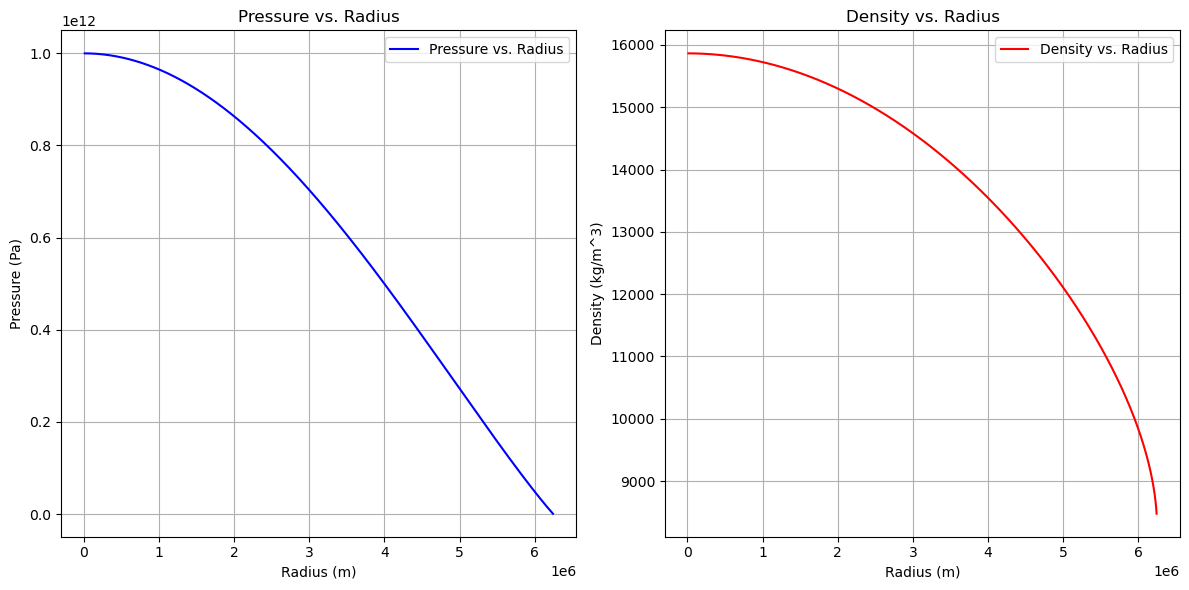

In [5]:
# Calculate the density list
density_list = [iron.density(P) for P in P_list]

# Convert radius to Earth radii and mass to Earth masses
R_earth = 6.371e6  # in meters
M_earth = 5.972e24  # in kg

# The final radius and mass
final_radius = r_list[len(r_list)-1] / R_earth
final_mass = m_list[len(r_list)-1] / M_earth

print(f"Final radius in terms of Earth's radius: {final_radius}")
print(f"Final mass in terms of Earth's mass: {final_mass}")

# Creating plots
plt.figure(figsize=(12, 6))

# Pressure vs. Radius plot
plt.subplot(1, 2, 1)
plt.plot(r_list, P_list, '-b', label='Pressure vs. Radius')
plt.xlabel('Radius (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure vs. Radius')
plt.grid(True)
plt.legend(loc='upper right')

# Density vs. Radius plot
plt.subplot(1, 2, 2)
plt.plot(r_list, density_list, '-r', label='Density vs. Radius')
plt.xlabel('Radius (m)')
plt.ylabel('Density (kg/m^3)')
plt.title('Density vs. Radius')
plt.grid(True)
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Problem 2

In [7]:
"""
def rho(P):
    if P <= 0:
        return 0  # or some other appropriate response to non-positive pressures
    else:
        return rho0 + c*P**n
"""

In [59]:
def rho(P, material):
    if P <= 0:
        return 0  
    else:
        return material.rho0 + material.c*P**material.n

In [60]:
# Minimum and maxium pressures were determined by the mass range of 0.1 to 100 Earth masses
min_pressure =83e9
max_pressure = 145e12
number_pressures = 50
# Creating an array of central pressures
central_pressures = np.linspace(start=min_pressure, stop=max_pressure, num=number_pressures)

M_earth = 5.972e24
R_earth = 6.371e6

masses = []
radii = []

for Pc in central_pressures:
    r_list, m_list, P_list, iteration = integrate(m0, Pc, r0, dr, iron)

    R = r_list[len(r_list)-1] / R_earth  # Convert to Earth radii
    M = m_list[len(r_list)-1] / M_earth  # Convert to Earth masses

    radii.append(R)
    masses.append(M)


C:\Users\julia\AppData\Local\Temp\ipykernel_19480\3712945421.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return self.rho0 + self.c * P**self.n


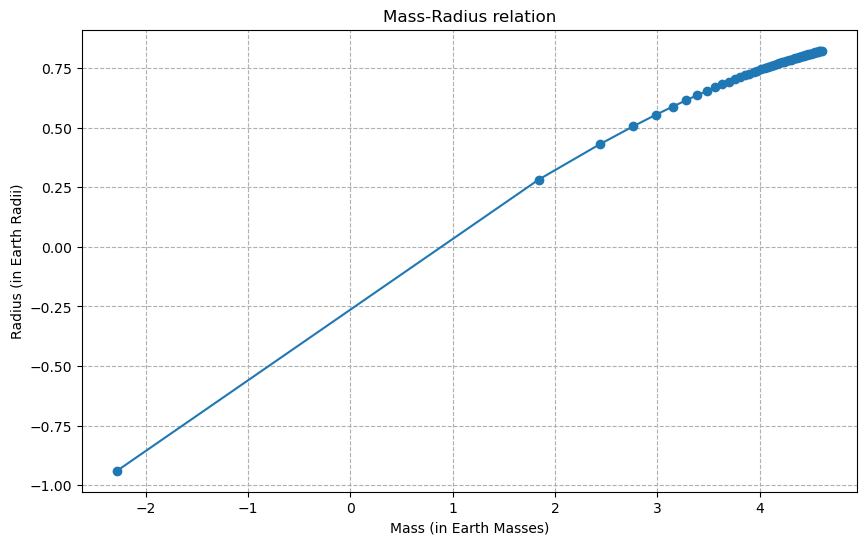

In [61]:
# Plotting the function

# Creating an arrray
radii_array = np.array(radii)
masses_array = np.array(masses)
# Converting to log
log_radii = np.log(radii_array)
log_masses = np.log(masses_array)
# Plot figure
plt.figure(figsize=(10, 6))
plt.plot(log_masses, log_radii, '-o')  # log-log plot for both axes
plt.title('Mass-Radius relation')
plt.xlabel('Mass (in Earth Masses)')
plt.ylabel('Radius (in Earth Radii)')
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
# Problem 3

In [10]:
# Materials h2O and mgsio3
h2o = Material(rho0=146e1, c=3.11e-3, n=5.13e-1)
mgsio3 = Material(rho0=41e2, c=161e-5, n=5.49e-1)

C:\Users\julia\AppData\Local\Temp\ipykernel_19480\1823467560.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return self.rho0 + self.c * P**self.n


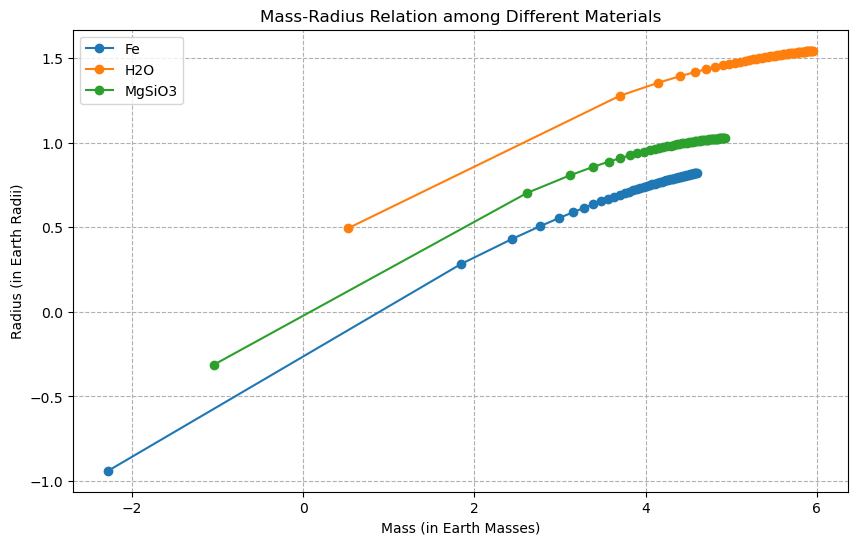

In [12]:
# Arrays to store results for different h2o and mgsio3
radii_h2o, masses_h2o = [], []
radii_mgsio3, masses_mgsio3 = [], []

for Pc in central_pressures:
    # For H2O
    r_list, m_list, P_list, iteration = integrate(m0, Pc, r0, dr, h2o)
    radii_h2o.append(r_list[-1] / R_earth)
    masses_h2o.append(m_list[-1] / M_earth)

    # For MgSiO3
    r_list, m_list, P_list, iteration = integrate(m0, Pc, r0, dr, mgsio3)
    radii_mgsio3.append(r_list[-1] / R_earth)
    masses_mgsio3.append(m_list[-1] / M_earth)

# Converting results to log for plot
#Creating an array, converting array to log for both h2o and mgsio3
radii_array_h2o = np.array(radii_h2o)
masses_array_h2o = np.array(masses_h2o)

log_radii_h2o = np.log(radii_array_h2o)
log_masses_h2o = np.log(masses_array_h2o)

radii_array_mgsio3 = np.array(radii_mgsio3)
masses_array_mgsio3 = np.array(masses_mgsio3)

log_radii_mgsio3 = np.log(radii_array_mgsio3)
log_masses_mgsio3 = np.log(masses_array_mgsio3)

# Plotting for Fe, H2O, MgSiO3
plt.figure(figsize=(10, 6))

plt.plot(log_masses, log_radii, '-o', label='Fe')  
plt.plot(log_masses_h2o, log_radii_h2o, '-o', label='H2O')
plt.plot(log_masses_mgsio3, log_radii_mgsio3, '-o', label='MgSiO3')


plt.xlabel('Mass (in Earth Masses)')
plt.ylabel('Radius (in Earth Radii)')
plt.title('Mass-Radius Relation among Different Materials')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [79]:
# Dictionary of terrestrial planets and exoplants, as well as mass error for exoplanets
planets = {
    'Mercury': {'mass': 0.33e24/M_earth, 'radius': 4879*1000 / 2/R_earth},
    'Venus': {'mass': 4.87e24/M_earth, 'radius': 12104*1000 / 2/R_earth},
    'Earth': {'mass': 5.97e24/M_earth, 'radius': 12756*1000 / 2/R_earth},
    'Mars': {'mass': 0.642e24/M_earth, 'radius': 6792*1000 / 2/R_earth},
    'HD 3167 b': {'mass': 5.02, 'radius': 1.7, 'mass_error': (0.38, -0.38)},
    'Kepler-93 b': {'mass': 4.02, 'radius': 1.478, 'mass_error': (0.68, -0.68)},
    'GJ 357': {'mass': 1.84, 'radius': 1.217, 'mass_error': (0.31, -0.31)},
    'TRAPIST-1 d': {'mass': 0.297, 'radius': 0.784, 'mass_error': (0.039, -0.035)},
    
}

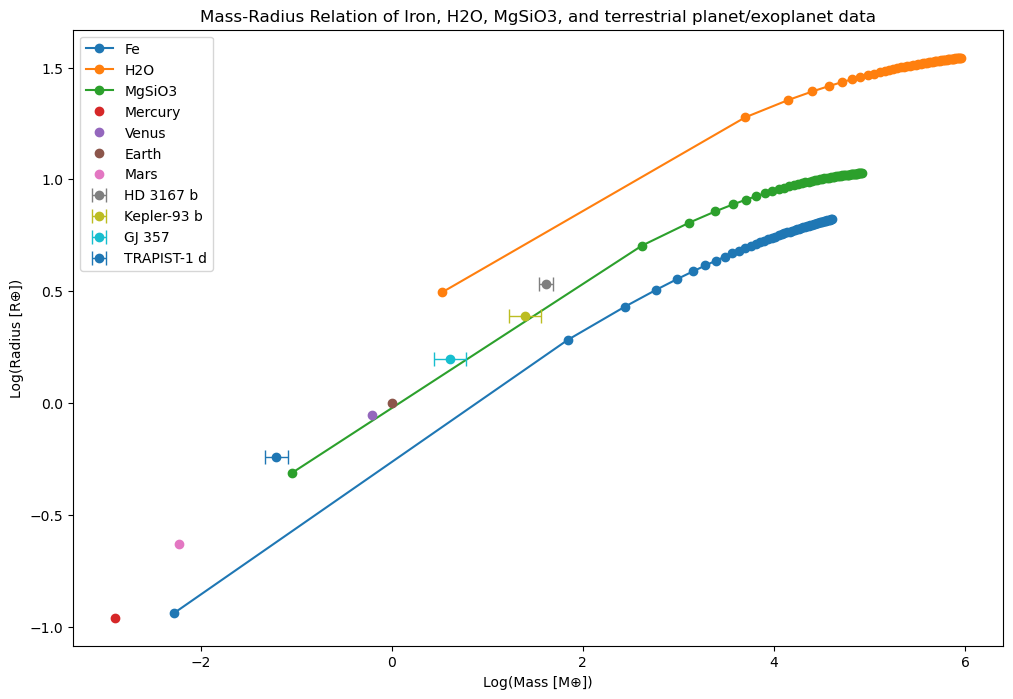

In [83]:
# Plotting Fe, H2O, MgSiO3 mass radius relations, as well as terrestrial planet and exoplanet points
plt.figure(figsize=(12, 8))

# Plotting the mass-radius relation for iron, h2o, and mgsio3
plt.plot(log_masses, log_radii, '-o', label='Fe')  
plt.plot(log_masses_h2o, log_radii_h2o, '-o', label='H2O')
plt.plot(log_masses_mgsio3, log_radii_mgsio3, '-o', label='MgSiO3')

#Plotting error bars for exoplanets
for planet, attributes in planets.items():
    log_mass = np.log(attributes['mass'])  # Adjusted to log10 for consistency
    log_radius = np.log(attributes['radius'])  # Adjusted to log10 for consistency

    # Plot error bars if available
    if 'mass_error' in attributes:
        upper_mass_error = attributes['mass_error'][0]  # positive error
        lower_mass_error = attributes['mass_error'][1]  # negative error

        log_upper_mass_error = (upper_mass_error / attributes['mass'])
        log_lower_mass_error = (lower_mass_error / attributes['mass'])

        asymmetric_error = [[np.abs(log_lower_mass_error)], [np.abs(log_upper_mass_error)]]  # Note the double square brackets

        # Plotting exoplanet points with error bars
        plt.errorbar(x=log_mass, y=log_radius, xerr=asymmetric_error, fmt='o', capsize=5, elinewidth=1, label=planet)
    else:
        # Plotting the point without error bars for terrestrial planets
        plt.plot(log_mass, log_radius, 'o', label=planet)

# Title, lables, show plot
plt.title('Mass-Radius Relation of Iron, H2O, MgSiO3, and terrestrial planet/exoplanet data')
plt.xlabel("Log(Mass [M⊕])")
plt.ylabel("Log(Radius [R⊕])")
plt.legend()
plt.show()
